In [4]:
import os
import geopandas as gpd
import pandas as pd
shenzhen_grid = gpd.read_file('./data/shenzhen_grid/shenzhen_grid.shp')
fnid_chess = pd.read_csv('./data/shenzhen_grid/grid/ss_city_grid_by_cover.csv')

basemap = pd.DataFrame(shenzhen_grid.merge(fnid_chess)).drop(columns=['geometry'])
basemap_coord = basemap[['chess_x', 'chess_y']].to_numpy()

d:\Application\Conda\envs\geoneuro\lib\site-packages\geopandas\_compat.py:153: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  set_use_pygeos()
C:\Users\Cover\AppData\Local\Temp\ipykernel_186312\1338722531.py:2: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


In [5]:
csv_files = [f for f in os.listdir('./data/user_chains/') if f.endswith('.csv')]

['chain_edited_01159109.csv',
 'chain_edited_06854307.csv',
 'chain_edited_21410711.csv',
 'chain_edited_33816672.csv',
 'chain_edited_37852495.csv',
 'chain_edited_39317715.csv',
 'chain_edited_43283109.csv',
 'chain_edited_50665469.csv',
 'chain_edited_63445952.csv',
 'chain_edited_68492654.csv']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


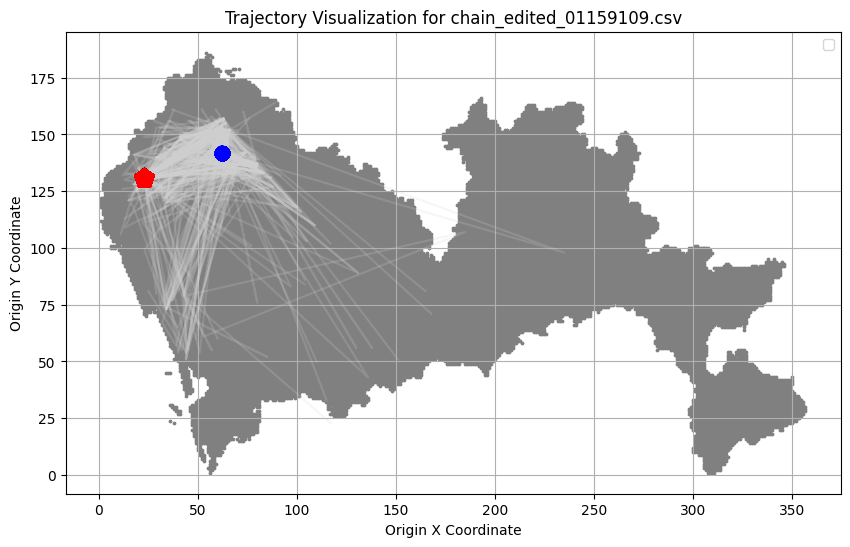

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


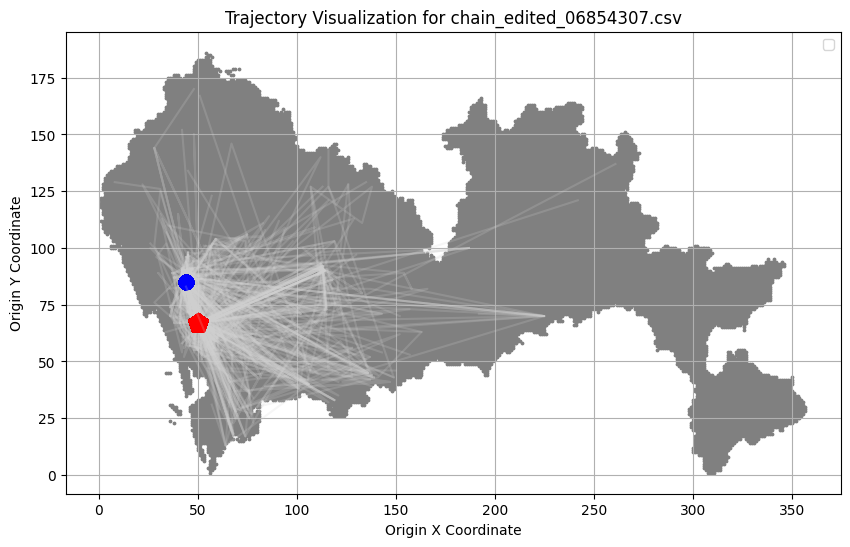

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


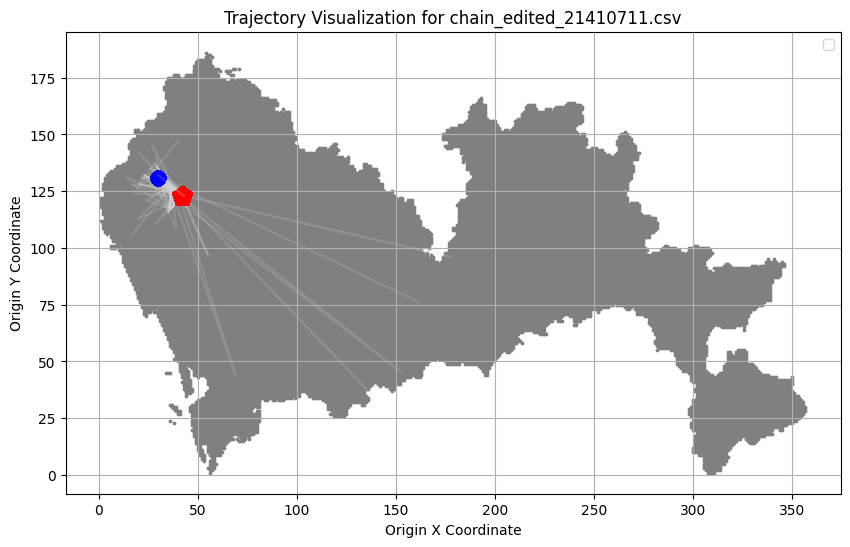

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


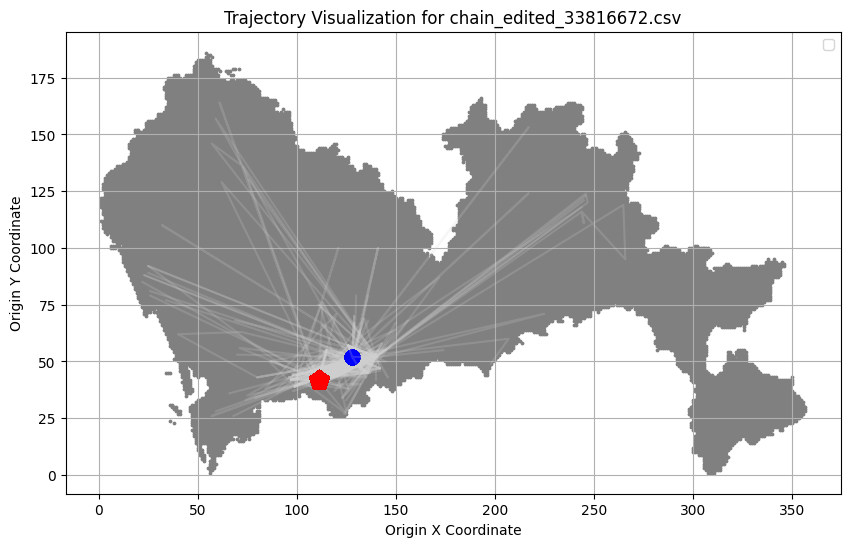

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


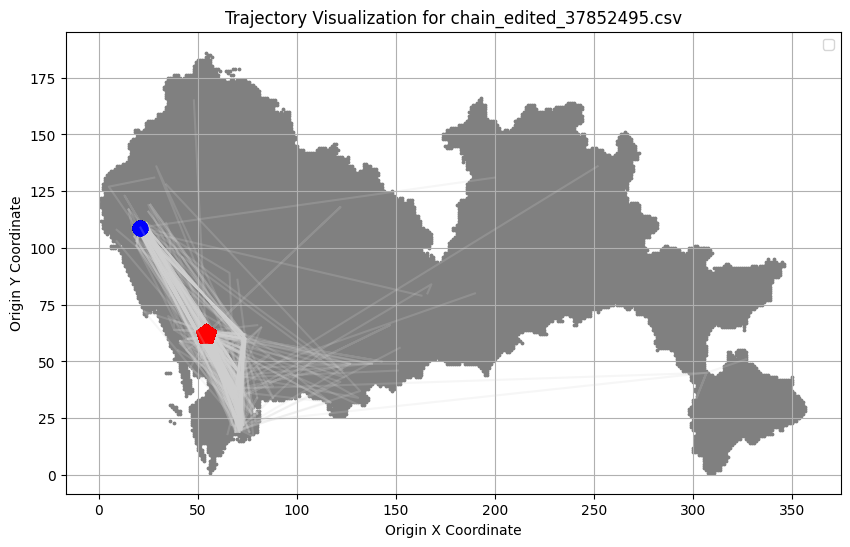

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


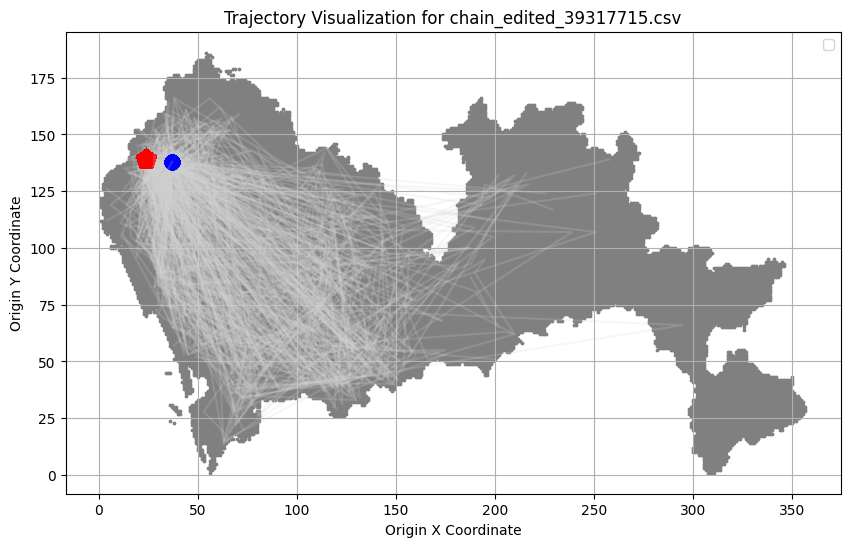

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


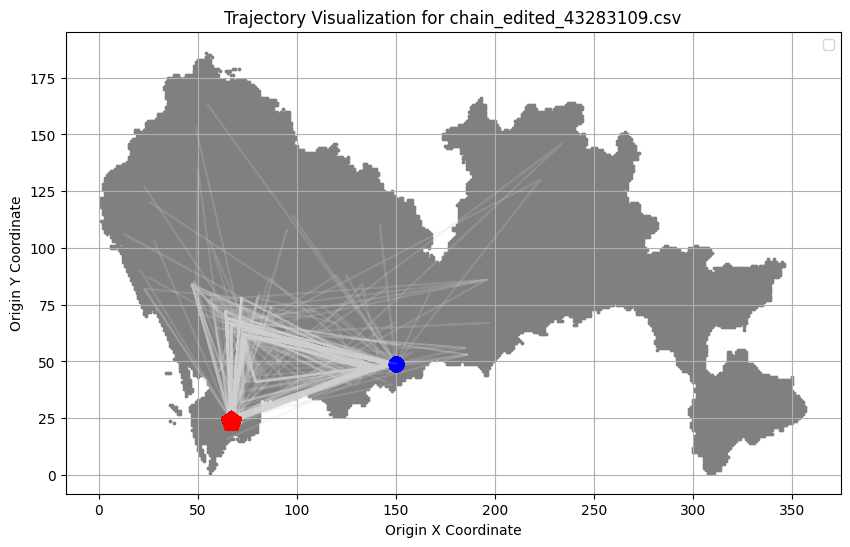

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


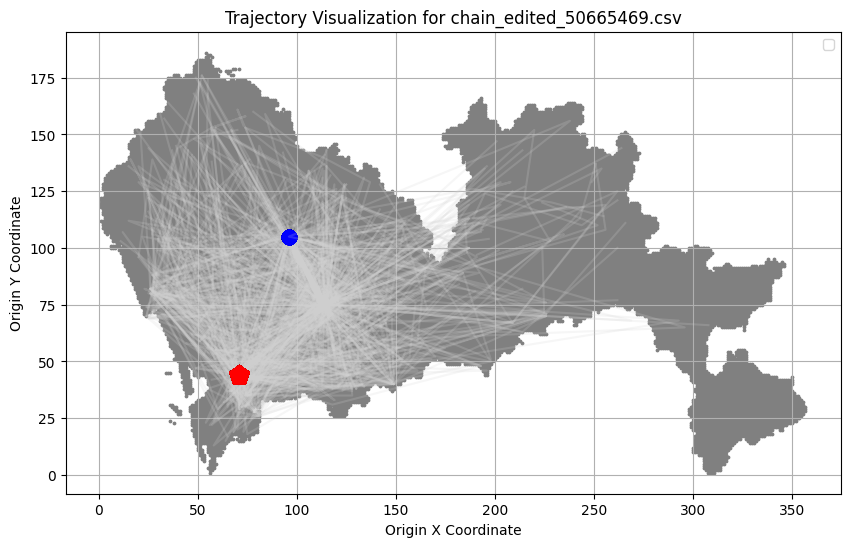

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


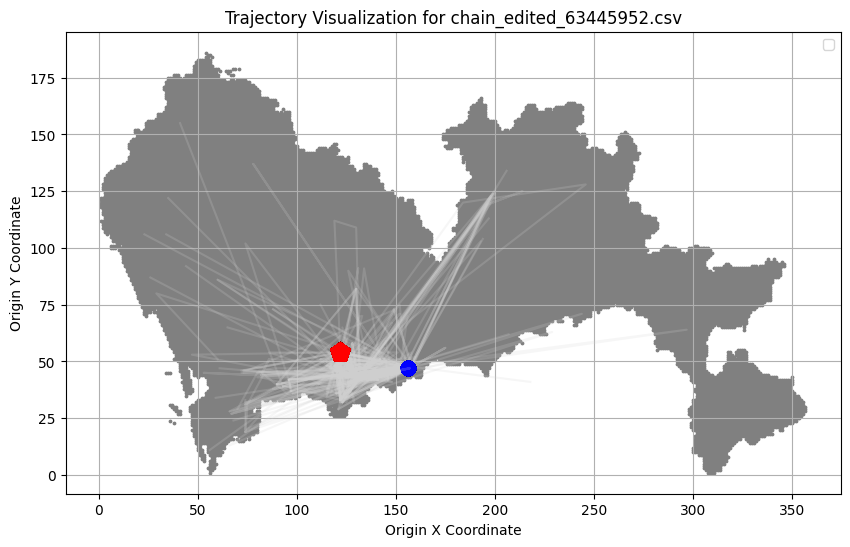

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


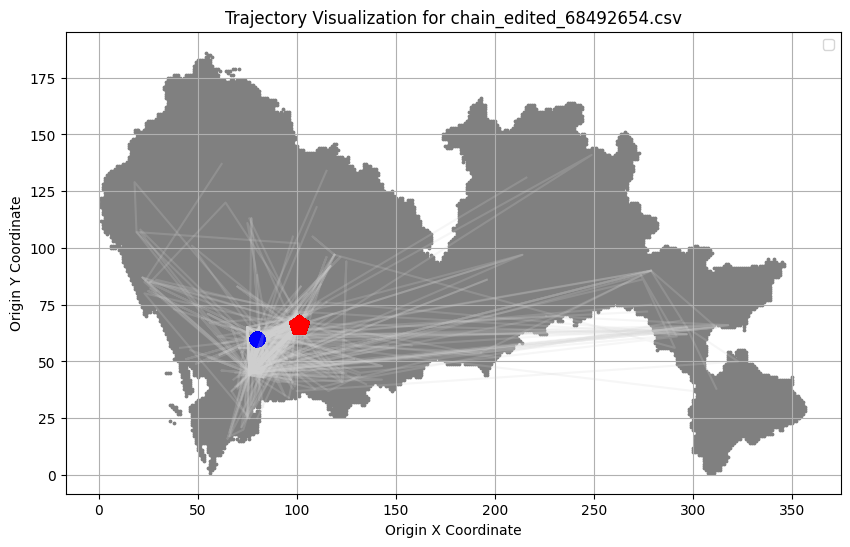

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 获取当前文件夹下的所有 CSV 文件
csv_files = [f for f in os.listdir('./data/user_chains/') if f.endswith('.csv')]

# 循环读取每个 CSV 文件并进行可视化
for file in csv_files:
    # 创建图形
    plt.figure(figsize=(10, 6))
    
    df = pd.read_csv('./data/user_chains/' + file)
    
    plt.scatter(basemap_coord[:, 0], basemap_coord[:, 1], s=3, color='grey',zorder=1)

    # 按照 `date` 进行分组
    for date, group in df.groupby('date'):
        # 按照 `seiqd` 进行排序
        group = group.sort_values(by='seiqd')
        
        # 按照 `seiqd` 是否连续分割不同的轨迹
        group['track_id'] = (group['seiqd'].diff() != 1).cumsum()
        
        # 按照 `track_id` 进行分组并绘制轨迹
        for track_id, track in group.groupby('track_id'):
            # 标记pre_chessxy和post_chessxy
            pre_x = track['pre_chess_x']
            pre_y = track['pre_chess_y']
            post_x = track['post_chess_x']
            post_y = track['post_chess_y']
            
            plt.scatter(pre_x, pre_y, marker='p', s=200, color='red',zorder=2)
            plt.scatter(post_x, post_y, marker='o', s=100, color='blue',zorder=2)
            
            x_coords = track['org_chess_x']
            y_coords = track['org_chess_y']
            # 绘制轨迹
            plt.plot(x_coords, y_coords, linestyle='-',color='lightgray', alpha=0.2)
    
    # 添加标题和标签
    plt.title(f'Trajectory Visualization for {file}')
    plt.xlabel('Origin X Coordinate')
    plt.ylabel('Origin Y Coordinate')
    plt.legend()
    plt.grid(True)
    
    # 保存图像
    pid = file.split('_')[-1].rstrip('.csv')
    plt.savefig(f'trajectory_visualization_{pid}.png')
    
    # 显示图形
    plt.show()
